### Objective: The objective of this assignment is to implement PCA on a given dataset and analyse the results.



### Instructions:
Download the wine dataset from the UCI Machine Learning Repository
(https://archive.ics.uci.edu/ml/datasets/Wine).

Load the dataset into a Pandas dataframe.

Split the dataset into features and target variables.

Perform data preprocessing (e.g., scaling, normalisation, missing value imputation) as necessary.

Implement PCA on the preprocessed dataset using the scikit-learn library.

Determine the optimal number of principal components to retain based on the explained variance ratio.

Visualise the results of PCA using a scatter plot.

Perform clustering on the PCA-transformed data using K-Means clustering algorithm.

Interpret the results of PCA and clustering analysis.
### Deliverables:
Jupyter notebook containing the code for the PCA implementation.

A report summarising the results of PCA and clustering analysis.

Scatter plot showing the results of PCA.

A table showing the performance metrics for the clustering algorithm.

### Additional Information:
You can use the python programming language.

You can use any other machine learning libraries or tools as necessary.

You can use any visualisation libraries or tools as necessary.


### Answers

In [34]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [35]:
df=pd.read_csv('winequality-red.csv',sep=';')
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [36]:
X=df.iloc[:,:-1]
y=df.iloc[:,-1]

In [37]:
X.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4


In [38]:
y.head()

0    5
1    5
2    5
3    6
4    5
Name: quality, dtype: int64

In [39]:
df.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

In [40]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.33,random_state=42)

In [41]:
from sklearn.decomposition import PCA

In [47]:
pca=PCA(n_components=2)

In [48]:
X_train=pca.fit_transform(X_train)
X_train

array([[ 24.0865946 ,   5.90774013],
       [-14.18726001,   4.32994576],
       [ 37.62559128,  27.63909757],
       ...,
       [ 37.14454805,  -9.14676774],
       [-32.95169694,  -1.80243483],
       [-37.72274986,  -4.76453446]])

In [49]:
pca.components_

array([[ 1.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         0.00000000e+00,  0.00000000e+00],
       [-0.00000000e+00,  1.00000000e+00, -1.11022302e-16,
         2.77555756e-16,  1.90819582e-17]])

In [50]:
pca.explained_variance_ratio_

array([0.94919055, 0.0459247 ])

/tmp/ipykernel_256/4216172576.py:1: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plt.scatter(X_train[:, 0], X_train[:, 1], cmap='viridis')


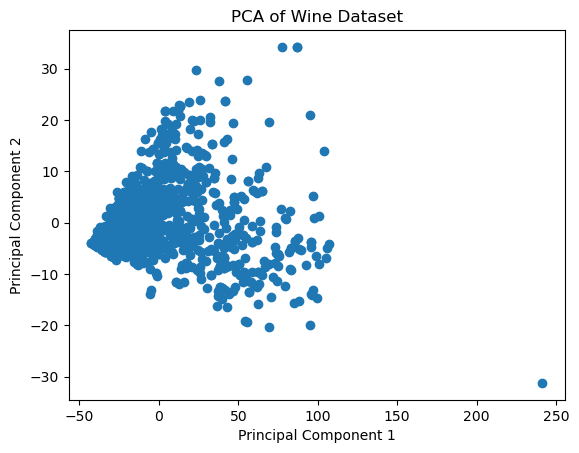

In [51]:
plt.scatter(X_train[:, 0], X_train[:, 1], cmap='viridis')
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.title("PCA of Wine Dataset")
plt.show()

In [52]:
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=3)  # Assuming 3 clusters based on Wine dataset
kmeans.fit(X_train)
cluster_labels = kmeans.labels_


/opt/conda/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [53]:
cluster_labels

array([2, 0, 2, ..., 1, 0, 0], dtype=int32)

In [56]:
from sklearn.metrics import silhouette_score

In [57]:
silhouette_avg = silhouette_score(X_train, cluster_labels)
print("Silhouette Score:", silhouette_avg)

Silhouette Score: 0.5339648447053368


- Examine the cluster labels and how well the PCA reduced the dimensionality while retaining information about the dataset.
- Visualize the clustered data to understand the separation of data points in the reduced space.
- Evaluate the clustering results using appropriate metrics (e.g., silhouette score, Davies-Bouldin index).